# CAMB: **C**ode for **A**nisotropies in the **M**icrowave **B**ackground

[Homepage de CAMB](https://camb.info)

- Código ampliamente utilizado en cosmología desarrollado por [Antony Lewis](https://inspirehep.net/authors/1000394) y [Anthony Challinor](https://inspirehep.net/authors/1031077)
- Resuelve las ecuaciones de Boltzmann y estima observables dado un set de parámetros cosmológicos.
- Cuenta con un [Python wrapper](https://camb.readthedocs.io/en/latest/), está escrito en [Fortran](https://camb.info/readme.html).
- [Paper](https://iopscience.iop.org/article/10.1086/309179) del código.

*Trabajo inspirado en tutorial de Alejandro Cartés*


In [ ]:
#pip install camb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


## 1. Definición de su modelo cosmológico

Una de las ideas cruciales que aprenderán en el curso, es que todo está sujeto a su modelo cosmológico.

En este caso, consideremos los parámetros de [Planck](https://arxiv.org/abs/1807.06209):

| | |
| - | - |
| $H_0 = (67.4 ± 0.5) km/s/Mpc $ | Hubble constant |
| $\Omega_m = 0.315 ± 0.0071$ | matter density parameter |
| $\Omega_c h^2: 0.120 ± 0.0011$ | dark matter density |
| $\Omega_b h^2 = 0.0224 ± 0.00011$ | baryon density |
| $n_s = 0.965 ± 0.0041$ | scalar spectral index | 
| $\tau = 0.054 ± 0.0071$ | optical depth | 

In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

Debemos darle un modelo cosmológico a CAMB, para que podamos hacer predicciones. Tenemos dos formas: `camb.CAMBparams()` y `camb.set_params()`.

### 1.1 `camb.CAMBparams()`

In [3]:
help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 |  equ

In [4]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [5]:
# Podemos cambiar algún parámetro después de fijar el modelo.

pars.set_dark_energy(w=-1);

pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [6]:
# Ahora, para obtener resultados podemos simplemente

results = camb.get_results(pars)

### 1.2 `camb.set_params()`

In [7]:
pars2 = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
results2 = camb.get_results(pars2)

## 2 Distances

In [8]:
help(results.luminosity_distance)

Help on method luminosity_distance in module camb.results:

luminosity_distance(z) method of camb.results.CAMBdata instance
    Get luminosity distance from to redshift z.

    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer functions or
    power spectra.

    :param z: redshift or array of redshifts
    :return: luminosity distance (matches rank of z)



In [9]:
help(results.angular_diameter_distance)

Help on method angular_diameter_distance in module camb.results:

angular_diameter_distance(z) method of camb.results.CAMBdata instance
    Get (non-comoving) angular diameter distance to redshift z.

    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer
    functions or power spectra.

    :param z: redshift or array of redshifts
    :return: angular diameter distances, matching rank of z



In [10]:
zs = np.linspace(0, 10, 1_000)
# d para cada red shift de zs
D_ang = results.angular_diameter_distance(zs)
D_lum = results.luminosity_distance(zs)

Text(0, 0.5, '$d$ [Mpc]')

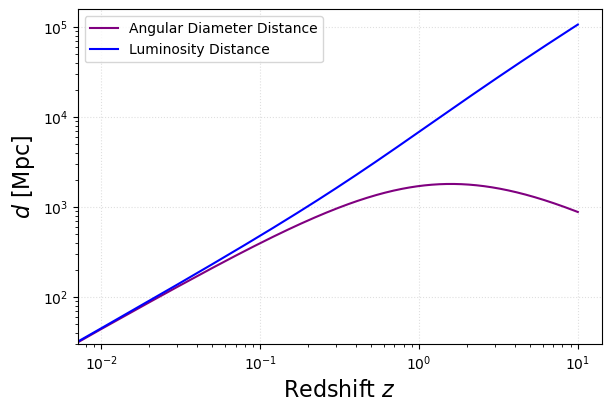

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, D_ang, color='purple', label='Angular Diameter Distance')
ax.loglog(zs, D_lum, color='b', label='Luminosity Distance')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$d$ [Mpc]', fontsize=16)

#### **Hágalo usted mismx:**


Comparar con la solución analítica con la de CAMB

$$ D_a(z) = \frac{f_K(\chi)}{1+z}, \quad D_L(z) = (1+z)f_K(\chi)$$ 

Donde:
\begin{align}
    f_K(\chi) =
    \begin{dcases}
        \frac{c}{H_0\sqrt{\Omega_{K,0}}} \sinh{\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}>0 \\
        \frac{c}{H_0}\int_0^z \frac{dx}{E(x)} & \Omega_{k,0}=0\\
        \frac{c}{H_0\sqrt{-\Omega_{K,0}}} \sin{\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}<0\\
    \end{dcases}
\end{align}


\begin{align}
    E(z) = H(z) / H_0
\end{align}


\begin{align}
    H^2(z) = H_0^2 \left[\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}(1+z)^{3(1+w)} + \Omega_{K,0}(1+z)^2\right]
\end{align}

In [ ]:
# parametros
Omegab = 0.05
Omegac = 0.2
Omegam = Omegab + Omegac
Omegal = 0.75
Omegar = 10**(-4)
Omegak = 0
w = -1
H0 = 67.4
def Fk(z,Omegak):
    

    output = 
    return output
def Hz(z):
    z1 = 1 + z
    output = H0**2*(Omegar*z1**4 + Omegam*z1**3 + Omegal*z1**(3*(1+w)) + Omegak*z1**2) 
    return output

def E(z):
    return Hz(z,Omegar,Omegam,Omegal,Omegak,H0,w)/H0 